# pipeline to predict sex

In [ ]:
!pip install git+https://github.com/wielandbrendel/bag-of-local-features-models.git

  Cloning https://github.com/wielandbrendel/bag-of-local-features-models.git to /tmp/pip-req-build-vhuyrxus
  Running command git clone -q https://github.com/wielandbrendel/bag-of-local-features-models.git /tmp/pip-req-build-vhuyrxus


In [ ]:
!pip install autokeras

In [ ]:
!pip install h5py

In [ ]:
import bagnets.kerasnet 

In [ ]:
!pip install segmentation-models

In [ ]:
#import_necessary_liberaries

import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn
import os
import glob
from os import *
from os.path import *
import random
import shutil
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.utils import np_utils
import autokeras as ak
from tensorflow.keras.datasets import mnist
%matplotlib inline


In [ ]:
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
#check whether our model can use gpu provided or not

physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num GPU  available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPU  available:  1


In [ ]:
#image_size_to_be_passed_inside_model
IMG_SIZE = (224, 224)

#base_path_of_folder_containing_information_of_age_and_sex_of_the_subjects
phenotype_files_path = "/content/drive/MyDrive/Anushka - IIT/temp_images.csv"

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# pipeline to predict sex

In [ ]:
#csv_file_containing_sex_of_the_subjects_information
df_sex = pd.read_csv("/content/drive/MyDrive/temp_images.csv")

#df_sex[['eid','male','female']] = df_sex['eid\tmale\tfemale'].str.split("\t",expand=True)
#df_sex = df_sex[['eid','male','female']]


df_sex.dropna(axis=0,how='any',inplace=True)
df_sex

,Unnamed: 0,x_train_sex,y_train_sex
0,0,/home/anushks/storage/projection/fda_coversion...,female
1,1,/home/anushks/storage/projection/fda_coversion...,male
2,2,/home/anushks/storage/projection/fda_coversion...,female
3,3,/home/anushks/storage/projection/fda_coversion...,male
4,4,/home/anushks/storage/projection/fda_coversion...,female
...,...,...,...
4995,4995,/home/anushks/storage/projection/fda_coversion...,female
4996,4996,/home/anushks/storage/projection/fda_coversion...,male
4997,4997,/home/anushks/storage/projection/fda_coversion...,male
4998,4998,/home/anushks/storage/projection/fda_coversion...,female


In [ ]:
from pickle import EMPTY_LIST
#convert_subject_ids_data_frame_series_to_list
ids_sex = df_sex['x_train_sex']                                                  #modified by anushka

idlist= []

for i,id in enumerate(ids_sex):
  id = "/content/drive/MyDrive/temp_images/" +id.split("/")[8]
  idlist.append(id)
idlist



['/content/drive/MyDrive/temp_images/1637162_21013_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/4391391_21013_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/3994567_21013_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/3275368_21013_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/3504004_21011_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/3939075_21013_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/5989907_21011_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/4772538_21011_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/3609818_21013_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/4965523_21011_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/3028546_21013_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/1499123_21011_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/5155800_21013_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/2700229_21013_0_0.fda.png',
 '/content/drive/MyDrive/temp_images/4206616_21013_0_0.fda.png',
 '/content/drive/MyDrive/

In [ ]:
input = []
for img in idlist[:1000]:
  img = cv2.imread(img)
  img = img.tolist()
  input.append(img)

In [ ]:
input= np.array(input)

In [ ]:
output = []
for i in df_sex['y_train_sex'].tolist()[:1000]:
 if i == 'male':
  output.append(1)
 else:
  output.append(0)  
  

In [ ]:
output = np.array(output)

In [ ]:
#split the training set into 80% train ,20% test images
input_train, input_test, output_train,output_test = train_test_split(input,output,test_size=0.2, random_state=10) #modified by anushka

In [ ]:
output_train

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
clf = ak.ImageClassifier(overwrite = True,max_trials = 4)

In [ ]:
history = clf.fit(input_train,output_train,epochs = 50)

Trial 4 Complete [00h 28m 20s]
val_loss: 0.6803973913192749

Best val_loss So Far: 0.6768205761909485
Total elapsed time: 01h 26m 48s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#split the training set into 80% train ,20% test images
x_train_sex, x_test_sex, y_train_sex, y_test_sex = train_test_split(idlist,df_sex['y_train_sex'].tolist(),test_size=0.2, random_state=10) #modified by anushka

In [ ]:
#create a data frame containing training set
train_data_sex = list(zip(x_train_sex,y_train_sex))  
train_dframe_sex = pd.DataFrame(train_data_sex, columns=['x_train_sex', 'y_train_sex'])  

In [ ]:
#create a data frame containing test set
test_data_sex = list(zip(x_test_sex,y_test_sex))  
test_dframe_sex = pd.DataFrame(test_data_sex, columns=['x_test_sex', 'y_test_sex'])  

In [ ]:
print (train_dframe_sex[train_dframe_sex.y_train_sex == 'male'].shape[0])

1857


In [ ]:
print (train_dframe_sex[train_dframe_sex.y_train_sex == 'female'].shape[0])

2143


In [ ]:
train_datagen_sex = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

In [ ]:
#a pointer to the training set
train_generator_sex = train_datagen_sex.flow_from_dataframe(
    train_dframe_sex,
    x_col="x_train_sex",
    y_col="y_train_sex",
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    seed=1,
    subset='training',
    interpolation='nearest' 
)
#a pointer to the validation set
validation_generator_sex = train_datagen_sex.flow_from_dataframe(
    train_dframe_sex,
    x_col="x_train_sex",
    y_col="y_train_sex",
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    seed=1,
    subset='validation',
    interpolation='nearest'
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 3841 invalid image filename(s) in x_col="x_train_sex". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 128 validated image filenames belonging to 2 classes.
Found 31 validated image filenames belonging to 2 classes.


In [ ]:
#finetuning a model using vgg16 to predict sex of the subject
base_model_sex = keras.models.load_model('/content/drive/MyDrive/bagnet32.h5')
base_model_sex.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
base_model_sex.layers.pop()
base_model_sex.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input0 (InputLayer)            [(None, 3, 224, 224  0           []                               
                                )]                                                                
                                                                                                  
 conv10.275406533888118 (Conv2D  (None, 64, 224, 224  192        ['input0[0][0]']                 
 )                              )                                                                 
                                                                                                  
 conv20.7357471192702366 (Conv2  (None, 64, 222, 222  36864      ['conv10.275406533888118[0][0]'] 
 D)                             )                                                           

In [ ]:
base_model_sex.layers.pop()
base_model_sex.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input0 (InputLayer)            [(None, 3, 224, 224  0           []                               
                                )]                                                                
                                                                                                  
 conv10.275406533888118 (Conv2D  (None, 64, 224, 224  192        ['input0[0][0]']                 
 )                              )                                                                 
                                                                                                  
 conv20.7357471192702366 (Conv2  (None, 64, 222, 222  36864      ['conv10.275406533888118[0][0]'] 
 D)                             )                                                           

In [ ]:
 base_model_sex.layers.pop()


AttributeError: ignored

In [ ]:
#training the model using the data
history_sex = base_model_sex.fit_generator(
    train_generator_sex,
    epochs=5,
    validation_data=validation_generator_sex
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


InvalidArgumentError: ignored

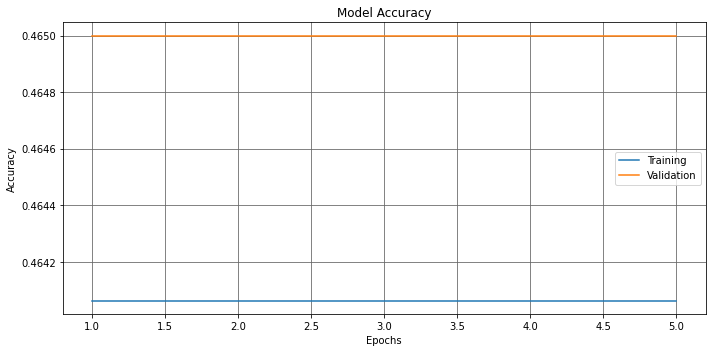

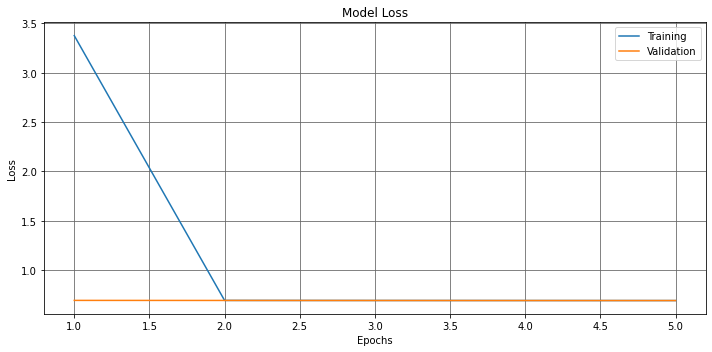

In [ ]:
#graph showing model accuracy and loss history
acc_sex = history_sex.history['accuracy']
val_acc_sex = history_sex.history['val_accuracy']
loss_sex = history_sex.history['loss']
val_loss_sex = history_sex.history['val_loss']

epochs_range_sex = range(1, len(history_sex.epoch) + 1)


plt.figure(figsize=(10,5))

plt.plot(epochs_range_sex, acc_sex, label='Training')
plt.plot(epochs_range_sex, val_acc_sex, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))

plt.plot(epochs_range_sex, loss_sex, label='Training')
plt.plot(epochs_range_sex, val_loss_sex, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()


In [ ]:
# creating a list of test_data to predict on .
imgs_sex=[]
for img in test_dframe_sex['x_test_sex'].tolist():
            
            img = cv2.imread(img)
            img = cv2.resize(
                img,
                dsize=IMG_SIZE,
                interpolation=cv2.INTER_CUBIC
            )
            imgs_sex.append(tf.keras.applications.vgg16.preprocess_input(img))
imgs_sex = np.array(imgs_sex)
predictions_sex = model_sex.predict(imgs_sex)
predictions_sex = [0 if x > 0.5 else 1 for x in predictions_sex]

In [ ]:
#creating a list of actual labels
actual_labels_sex = []
for label in test_dframe_sex['y_test_sex']:
    if label == 'male':
        actual_labels_sex.append(0)
    else:
        actual_labels_sex.append(1)

In [ ]:
#calculating accuracy of the model
accuracy_sex = accuracy_score(actual_labels_sex, predictions_sex)
print("Test Accuracy:", accuracy_sex)

Test Accuracy: 0.451


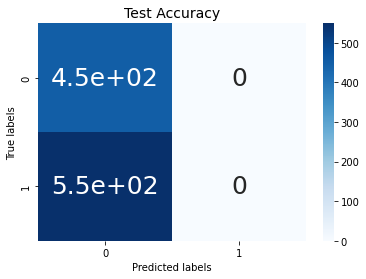

In [ ]:
#plotting confusion matrix(0-> if male or 1-> if female)
confusion_mtx_sex = confusion_matrix(actual_labels_sex, predictions_sex)

ax_sex = plt.axes()
sn.heatmap(confusion_mtx_sex, annot=True,annot_kws={"size": 25}, cmap="Blues", ax = ax_sex)
ax_sex.set_title('Test Accuracy', size=14)
ax_sex.set_xlabel('Predicted labels')
ax_sex.set_ylabel('True labels')
plt.show()